<a href="https://colab.research.google.com/github/tranhuuan170302/Recommended-system-of-information-technology-jobs-at-Viet-Nam/blob/main/clean_data_and_visualization_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import string 
import re
import time
import nltk
from nltk.stem import PorterStemmer
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier



from collections import Counter
import pandas as pd
import nltk
import string
from nltk.tokenize import word_tokenize

import math
sns.set()

# Read file data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/indeed/resultData.csv')

In [ ]:
df.head(5)

,Unnamed: 0,JobTitle,Company,Location,PostDate,ExtractDate,Summary,JobUrl
0,0,.Net Developer,SmartDev,Ðà Nẵng,Posted\nPosted 14 days ago,2023-01-25,Company Description\nSmartDev is a leading pro...,.NET Developer\n
1,1,Intern / Fresher Developer,DXC Technology,Thành phố Hồ Chí Minh,Employer\nActive 22 days ago,2023-01-25,Overview:\nHow would you like to join an inter...,.NET Developer\n
2,2,.NET Developer (Middle/Senior level),SIOUX,Ðà Nẵng,Posted\nPosted 30+ days ago,2023-01-25,Sioux Group was founded in 1996 in the Netherl...,.NET Developer\n
3,3,Jun/Mid/Senior .NET Developer,Saigon Technology,Ðà Nẵng,Posted\nPosted 18 days ago,2023-01-25,"Up to $2,200\nJunior, Middle, Senior\nDa Nang\...",.NET Developer\n
4,4,"Web Developer (.NET, ASP.NET, C#)",NPV Corp,Ðà Nẵng,Posted\nPosted 16 days ago,2023-01-25,"Web Developer (.NET, ASP.NET, C#)\nNPV Corp\nỨ...",.NET Developer\n


# Clean Summary

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
df['Summary'] = df['Summary'].apply(lambda x : re.sub(r'(<[^>]+>)|(http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+)',' ', x))
df['Summary'] = df['Summary'].str.replace('\n', ' ')

# Create the list keyword.

In [ ]:
# got these keywords by looking at some examples and using existing knowledge.
tool_keywords1 = ['sql', 'linqpad', 'teamcity', 'octopus', 'ncrunch', 'nuget', 'nunit', 'omnisharp', 'jetBrains rider', 'windbg', '.net reflector',
                  'reSharper', 'python', 'pytorch', 'sql', 'mxnet', 'mlflow', 'einstein', 'theano', 'pyspark', 'solr', 'mahout', 
                  'cassandra', 'aws', 'powerpoint', 'spark', 'pig', 'sas', 'java', 'nosql', 'docker', 'salesforce', 'scala', 'r',
                  'c', 'c++', 'net', 'tableau', 'pandas', 'scikitlearn', 'sklearn', 'matlab', 'scala', 'keras', 'tensorflow', 'clojure',
                  'caffe', 'scipy', 'numpy', 'matplotlib', 'vba', 'spss', 'linux', 'azure', 'cloud', 'gcp', 'mongodb', 'mysql', 'oracle', 
                  'redshift', 'snowflake', 'kafka', 'javascript', 'qlik', 'jupyter', 'perl', 'bigquery', 'unix', 'react',
                  'scikit', 'powerbi', 's3', 'ec2', 'lambda', 'ssrs', 'kubernetes', 'hana', 'spacy', 'tf', 'django', 'sagemaker',
                  'seaborn', 'mllib', 'github', 'git', 'elasticsearch', 'splunk', 'airflow', 'looker', 'rapidminer', 'birt', 'pentaho', 
                  'jquery', 'nodejs', 'd3', 'plotly', 'bokeh', 'xgboost', 'rstudio', 'shiny', 'dash', 'h20', 'h2o', 'hadoop', 'mapreduce', 
                  'hive', 'cognos', 'angular', 'nltk', 'flask', 'node', 'firebase', 'bigtable', 'rust', 'php', 'cntk', 'lightgbm', 
                  'kubeflow', 'rpython', 'unixlinux', 'postgressql', 'postgresql', 'postgres', 'hbase', 'dask', 'ruby', 'julia', 'tensor',
                  # added r packages doesn't seem to impact the result
                  'dplyr','ggplot2','esquisse','bioconductor','shiny','lubridate','knitr','mlr','quanteda','dt','rcrawler','caret','rmarkdown',
                  'leaflet','janitor','ggvis','plotly','rcharts','rbokeh','broom','stringr','magrittr','slidify','rvest',
                  'rmysql','rsqlite','prophet','glmnet','text2vec','snowballc','quantmod','rstan','swirl','datasciencer', 'amazon web services', 'google cloud', 'sql server']


In [ ]:
# hard skills/knowledge required.
skill_keywords1 = set(['statistics', 'cleansing', 'chatbot', 'cleaning', 'blockchain', 'causality', 'correlation', 'bandit', 'anomaly', 'kpi',
 'dashboard', 'geospatial', 'ocr', 'econometrics', 'pca', 'gis', 'svm', 'svd', 'tuning', 'hyperparameter', 'hypothesis',
 'salesforcecom', 'segmentation', 'biostatistics', 'unsupervised', 'supervised', 'exploratory',
 'recommender', 'recommendations', 'research', 'sequencing', 'probability', 'reinforcement', 'graph', 'bioinformatics',
 'chi', 'knn', 'outlier', 'etl', 'normalization', 'classification', 'optimizing', 'prediction', 'forecasting',
 'clustering', 'cluster', 'optimization', 'visualization', 'nlp', 'c#', 'negotiation', 'self learning', 
 'regression', 'logistic', 'nn', 'cnn', 'glm', 'sloving', 'ux ui', 'teamwork', 'creative thinking'
 'rnn', 'lstm', 'gbm', 'boosting', 'recurrent', 'convolutional', 'bayesian',
 'bayes', 'random forest', 'natural language processing', 'machine learning', 'decision tree', 'deep learning', 'experimental design',
 'time series', 'nearest neighbors', 'neural network', 'support vector machine', 'computer vision', 'machine vision', 'dimensionality reduction', 
 'text analytics', 'power bi', 'a/b testing', 'ab testing', 'chat bot', 'data mining'])


In [ ]:
degree_dict = ['bs', 'bachelor', 'undergraduate', 'certificate',
               'master', 'graduate', 'mba', 'intermediate',
               'phd', 'ph.d', 'ba', 'ma', 'it',
               'postdoctoral', 'postdoc', 'doctorate', 'new graduate', 'đại học']

In [ ]:
nltk.download('punkt')
# required for parts of speech tagging
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# parts of speech tagging
tagged = nltk.pos_tag(tool_keywords1)

In [ ]:
print(tagged[:10])

[('sql', 'NN'), ('linqpad', 'NN'), ('teamcity', 'NN'), ('octopus', 'VBP'), ('ncrunch', 'JJ'), ('nuget', 'NN'), ('nunit', 'NN'), ('omnisharp', 'JJ'), ('jetBrains rider', 'NN'), ('windbg', 'NN')]


In [ ]:
from nltk import pos_tag
from nltk.stem import PorterStemmer

ps = PorterStemmer()


# process the job description.
def prepare_job_desc(desc):
    # tokenize description.
    tokens = word_tokenize(desc)
        
    # Parts of speech (POS) tag tokens.
    token_tag = pos_tag(tokens)
    
    # Only include some of the POS tags.
    include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens = [tok for tok, tag in token_tag if tag in include_tags]
    
    # stem words.
    stemmed_tokens = [ps.stem(tok).lower() for tok in filtered_tokens]
    return set(stemmed_tokens)

df['job_description_word_set'] = df['Summary'].map(prepare_job_desc)


In [ ]:
df.head()

,Unnamed: 0,JobTitle,Company,Location,PostDate,ExtractDate,Summary,JobUrl,job_description_word_set
0,0,.Net Developer,SmartDev,Ðà Nẵng,Posted\nPosted 14 days ago,2023-01-25,Company Description SmartDev is a leading prov...,.NET Developer\n,"{s, milk, system, solut, collabor, html5/, be,..."
1,1,Intern / Fresher Developer,DXC Technology,Thành phố Hồ Chí Minh,Employer\nActive 22 days ago,2023-01-25,Overview: How would you like to join an intern...,.NET Developer\n,"{been, fresh, system, be, từ, opportun, englis..."
2,2,.NET Developer (Middle/Senior level),SIOUX,Ðà Nẵng,Posted\nPosted 30+ days ago,2023-01-25,Sioux Group was founded in 1996 in the Netherl...,.NET Developer\n,"{s, look, servic, 16+3, company-sponsor, 30,00..."
3,3,Jun/Mid/Senior .NET Developer,Saigon Technology,Ðà Nẵng,Posted\nPosted 18 days ago,2023-01-25,"Up to $2,200 Junior, Middle, Senior Da Nang Fu...",.NET Developer\n,"{5, implement, microsoft, 3, must, competit, e..."
4,4,"Web Developer (.NET, ASP.NET, C#)",NPV Corp,Ðà Nẵng,Posted\nPosted 16 days ago,2023-01-25,"Web Developer (.NET, ASP.NET, C#) NPV Corp Ứng...",.NET Developer\n,"{phân, về, với, như, gia, phường, quả, đào, có..."


In [ ]:
tool_keywords1_set = set([ps.stem(tok) for tok in tool_keywords1])
skill_keywords1_set = set([ps.stem(tok) for tok in skill_keywords1])
degree_set = set([ps.stem(tok) for tok in degree_dict])

In [ ]:
degree_dict = {ps.stem(tok): tok for tok in degree_dict}
skill_keywords1_dict = {ps.stem(tok): tok for tok in skill_keywords1}
tool_keywords1_dict = {ps.stem(tok): tok for tok in tool_keywords1}

In [ ]:
skill_keywords1_dict['cleans']

'cleansing'

In [ ]:
def tool_word(string):
  tool_words = ''
  words = tool_keywords1_set.intersection(string)
  if len(words) == 0:
    tool_words = 'Not_tool'
  else:
    for word in words:
      tool_words += word
      tool_words += ' '
  return tool_words

df['tool_words'] = df['job_description_word_set'].map(tool_word)

In [ ]:
def skill_word(string):
  tool_words = ''
  words = skill_keywords1_set.intersection(string)
  if len(words) == 0:
    tool_words = 'Not_skill'
  else:
    for word in words:
      tool_words += word
      tool_words += ' '
  return tool_words

df['skill_words'] = df['job_description_word_set'].map(skill_word)

In [ ]:
def stringReplace(string):
    """replace space string """
    index = string.find('  ')
    while index >= 0:
        string = string.replace('  ', ' ')
        index = string.find('  ')
    string = string.strip()
    return string

def degree_word(string):
    tool_words = ''
    string = string.lower()
    string = string.replace('đại học', 'graduate')
    string = string.replace('chứng chỉ', 'certificate')
    string = re.sub(r'\W', ' ', string)
    string = stringReplace(string)
    string = string.split(' ')
    stemmed_tokens = [ps.stem(tok) for tok in string]
    words = degree_set.intersection(stemmed_tokens)
    if len(words) == 0:
      tool_words = 'Not_degree'
    else:
      for word in words:
        tool_words += word
        tool_words += ' '
    return tool_words

In [ ]:
df['degree'] = df['Summary'].map(degree_word)

In [ ]:
df.loc[df['degree'] == 'Not degree', :]

,Unnamed: 0,JobTitle,Company,Location,PostDate,ExtractDate,Summary,JobUrl,job_description_word_set,tool_words,skill_words,degree


In [ ]:
df['Summary'][4337]

"Hybrid or remote work, flexible hours Learn cutting-edge technology while working with excellent global engineers About Our Client The Client is a well-funded start-up in the manufacturing and procurement industry. Job Description Responsibilities: Lead the entire architecture design of system software products Make technical decisions used for the products, including middleware, frameworks, and other technologies. Working with a product owner, ensure the delivery of products with the required functionality, performance, and quality. Conduct troubleshooting of the products by giving technical suggestions. Mentor the other developers in the team.  Tech stacks: Development language: TypeScript, Rust, Python, Javascript frameworks Infrastructure: GCP, GKE Database: PostgreSQL, Firestore API: GraphQL, REST, gRPC Development tools: GitHub, CircleCI, Figma, Sentry, DataDog, Storybook Communication tools: Slack, Discord, JIRA, Miro The Successful Applicant 5+ years experience in web developm

In [ ]:
df['Summary'] = df.Summary.apply(lambda x: word_tokenize(x))
df['Summary'] = df.Summary.apply(lambda x: [ps.stem(word) for word in x])
df['Summary'] = df.Summary.apply(lambda x: ' '.join(x))

In [ ]:
df['Summary'] = df['Summary'].str.replace('năm', 'year')

df['YearExperience'] = df['Summary'].apply(lambda x : re.findall(r'([0-9]+) year',x))
df['YearExperience'] = df['YearExperience'].apply(lambda y : [0] if len(y)==0 else y)

In [ ]:
def convertInt(array):
    result = []
    for arr in array:
        result.append(int(arr))
    return min(result)

In [ ]:
df['YearExperience'] = df['YearExperience'].apply(lambda arr: convertInt(arr)) 

In [ ]:
df['YearExperience'] 

0       0
1       0
2       4
3       2
4       1
       ..
4374    3
4375    2
4376    2
4377    3
4378    5
Name: YearExperience, Length: 4379, dtype: int64

In [ ]:
df['Summary'][10]

"who are we ? amari consult is an independ technolog consult firm provid guidanc and solut to busi . with more than 1000 client across the globe , we have been roll out solut in major project for over a decad – thi is made possibl by an intern team of 6000 peopl spread across 5 contin and more than 60 countri . our solut focu on four differ busi line : inform system & digit , telecom , life scienc and engin . we ’ re focus on build and nurtur a top talent commun where all our team member can achiev their full potenti . amari is your steppingston to cross river of chang , meet challeng and achiev all your project with success . at amari , we strive to provid our candid with the best possibl recruit experi . we like to get to know our candid , challeng them , and be abl to give them proper feedback as quickli as possibl . here 's what our recruit process look like : brief call : our process typic begin with a brief virtual/phon convers to get to know you ! the object ? learn about you , 

In [ ]:
# https://www.kaggle.com/code/prena0808/data-science-job-analysis-and-insights-using-nlp#Forming-the-Lists-of-Keywords

In [ ]:
df.head()

,Unnamed: 0,JobTitle,Company,Location,PostDate,ExtractDate,Summary,JobUrl,job_description_word_set,tool_words,skill_words,degree,YearExperience
0,0,.Net Developer,SmartDev,Ðà Nẵng,Posted\nPosted 14 days ago,2023-01-25,compani descript smartdev is a lead provid of ...,.NET Developer\n,"{s, milk, system, solut, collabor, html5/, be,...",nodej c sql aw,clean visual,Not_degree,0
1,1,Intern / Fresher Developer,DXC Technology,Thành phố Hồ Chí Minh,Employer\nActive 22 days ago,2023-01-25,overview : how would you like to join an inter...,.NET Developer\n,"{been, fresh, system, be, từ, opportun, englis...",c++ sql javascript linux c,Not_skill,graduat,0
2,2,.NET Developer (Middle/Senior level),SIOUX,Ðà Nẵng,Posted\nPosted 30+ days ago,2023-01-25,sioux group wa found in 1996 in the netherland...,.NET Developer\n,"{s, look, servic, 16+3, company-sponsor, 30,00...",r c sql,teamwork clean,it ma bachelor,4
3,3,Jun/Mid/Senior .NET Developer,Saigon Technology,Ðà Nẵng,Posted\nPosted 18 days ago,2023-01-25,"up to $ 2,200 junior , middl , senior da nang ...",.NET Developer\n,"{5, implement, microsoft, 3, must, competit, e...",react sql azur aw,teamwork,certif master,2
4,4,"Web Developer (.NET, ASP.NET, C#)",NPV Corp,Ðà Nẵng,Posted\nPosted 16 days ago,2023-01-25,"web develop ( .net , asp.net , c # ) npv corp ...",.NET Developer\n,"{phân, về, với, như, gia, phường, quả, đào, có...",c net sql,chi,graduat,1


In [ ]:
def level_dev(string):
    level = ['intern', 'junior', 'senior', 'middle', 'fresher', 'full stack']
    levels = dict((x,0) for x in level)
    result = ''
    for i in levels:
        st = ' '+ i + ' '
        if (string.__contains__(st)):
            
            result += i
            result += ', '
    return result

In [ ]:
df['level'] = df['Summary'].map(level_dev)

In [ ]:
indxs = df.loc[df['level'] == '', :].index
for indx in indxs:
    if df['YearExperience'][indx] == 0:
        df['level'][indx] = 'fresher'
    elif df['YearExperience'][indx] <= 3:
        df['level'][indx] = 'junior'
    else:
        df['level'][indx] = 'senior'

<ipython-input-34-5a6ba6f1dade>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['level'][indx] = 'junior'
<ipython-input-34-5a6ba6f1dade>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['level'][indx] = 'fresher'
<ipython-input-34-5a6ba6f1dade>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['level'][indx] = 'senior'


In [ ]:
df['JobTitle'] = df['JobTitle'].str.lower()
df['Location'] = df['Location'].str.lower()
df['Company'] = df['Company'].str.lower()

In [ ]:
df['Location'] = df['Location'].apply(lambda string: string.replace('\n', '') if string.find('\n') >=0 else string , '')
df['JobTitle'] = df['JobTitle'].apply(lambda string: string.replace(string[string.index('('): len(string)], '') if string.find('(') >=0 else string , '')
df['JobTitle'] = df['JobTitle'].apply(lambda string: string.replace(string[string.index('['): string.index(']')], '') if string.find('[') >=0 else string, '')
df['JobUrl'] = df['JobUrl'].str.replace('\n', '')

In [ ]:
df['JobTitle'] = df['JobTitle'].apply(lambda x : re.sub('\W',' ',x))
df['JobTitle'] = df['JobTitle'].apply(lambda x : re.sub('intern|fresher|middle|junior|mid|jun|senior',' ',x))
df['JobTitle'] = df['JobTitle'].apply(lambda string: stringReplace(string))

In [ ]:
df['Location'] = df['Location'].str.replace('ð', 'đ')

In [ ]:
data = df[['JobTitle', 'Company', 'Location', 'degree', 'tool_words', 'skill_words', 'level', 'YearExperience', 'JobUrl']]

In [ ]:
data = data.reset_index()

In [ ]:
data.head(5)

,index,JobTitle,Company,Location,degree,tool_words,skill_words,level,YearExperience,JobUrl
0,0,net developer,smartdev,đà nẵng,Not_degree,nodej c sql aw,clean visual,"intern,",0,.NET Developer
1,1,developer,dxc technology,thành phố hồ chí minh,graduat,c++ sql javascript linux c,Not_skill,"intern,",0,.NET Developer
2,2,net developer,sioux,đà nẵng,it ma bachelor,r c sql,teamwork clean,"intern,",4,.NET Developer
3,3,net developer,saigon technology,đà nẵng,certif master,react sql azur aw,teamwork,"junior, senior,",2,.NET Developer
4,4,web developer,npv corp,đà nẵng,graduat,c net sql,chi,junior,1,.NET Developer


In [ ]:
data['tool_words'] = data['tool_words'].str.strip()
data['skill_words'] = data['skill_words'].str.strip()

In [ ]:

# phân chuỗi trong cột skill ra list rồi thực chia theo cột unnamed: 0
skill = pd.DataFrame(data.set_index('index').skill_words.str.split(' ', expand=True).stack().reset_index(level=1, drop=True)).reset_index()

In [ ]:
# đổi tên cột 0 trong dataFrame skill thành 'skill_cut'
skill.rename(columns = {0:'skill_cut'}, inplace = True)

In [ ]:
# gộp dataFrame df và skill vói nhay theo "Unnameed: 0"
data = data.merge(skill, left_on = 'index', right_on = 'index')

In [ ]:
data[['index', 'JobTitle', 'Company', 'Location', 'skill_cut',]]

,index,JobTitle,Company,Location,skill_cut
0,0,net developer,smartdev,đà nẵng,clean
1,0,net developer,smartdev,đà nẵng,visual
2,1,developer,dxc technology,thành phố hồ chí minh,Not_skill
3,2,net developer,sioux,đà nẵng,teamwork
4,2,net developer,sioux,đà nẵng,clean
...,...,...,...,...,...
6830,4375,react native developerusd,việc ơi client,hà nội,teamwork
6831,4376,ruby on rails,việc ơi it client,hà nội,Not_skill
6832,4377,lập trình viên fullstack,jobsgo recruit,thành phố hồ chí minh,research
6833,4378,fullstack engineer,zühlke,thành phố hồ chí minh,chi


In [ ]:
data.loc[data.duplicated() == True,:]

,index,JobTitle,Company,Location,degree,tool_words,skill_words,level,YearExperience,JobUrl,skill_cut


In [ ]:
datax = data[['index', 'tool_words']]
datax = datax.loc[datax.duplicated() == False, :]

In [ ]:

# phân chuỗi trong cột skill ra list rồi thực chia theo cột unnamed: 0
skill = pd.DataFrame(datax.set_index('index').tool_words.str.split(' ', expand=True).stack().reset_index(level=1, drop=True)).reset_index()
# đổi tên cột 0 trong dataFrame skill thành 'skill_cut'
skill.rename(columns = {0:'tool_cut'}, inplace = True)
# gộp dataFrame df và skill vói nhay theo "Unnameed: 0"
data = data.merge(skill, left_on = 'index', right_on = 'index')

In [ ]:
data.loc[data.duplicated() == True,:]

,index,JobTitle,Company,Location,degree,tool_words,skill_words,level,YearExperience,JobUrl,skill_cut,tool_cut


In [ ]:
data['degree'] = data['degree'].str.strip()

In [ ]:
datax1 = data[['index', 'degree']]
datax1 = datax1.loc[datax1.duplicated() == False, :]
# phân chuỗi trong cột skill ra list rồi thực chia theo cột unnamed: 0
skill = pd.DataFrame(datax1.set_index('index').degree.str.split(' ', expand=True).stack().reset_index(level=1, drop=True)).reset_index()
# đổi tên cột 0 trong dataFrame skill thành 'skill_cut'
skill.rename(columns = {0:'degree_cut'}, inplace = True)
# gộp dataFrame df và skill vói nhay theo "Unnameed: 0"
data = data.merge(skill, left_on = 'index', right_on = 'index')

In [ ]:
data.loc[data.duplicated() == True,:]

,index,JobTitle,Company,Location,degree,tool_words,skill_words,level,YearExperience,JobUrl,skill_cut,tool_cut,degree_cut


In [ ]:
data.loc[data['index'] == 100,:]

,index,JobTitle,Company,Location,degree,tool_words,skill_words,level,YearExperience,JobUrl,skill_cut,tool_cut,degree_cut
810,100,net engineer,nashtech,đà nẵng,it bachelor,angular sql aw cloud azur react javascript c d...,teamwork chi clean optim,"intern, junior, senior,",0,.NET Developer,teamwork,angular,it
811,100,net engineer,nashtech,đà nẵng,it bachelor,angular sql aw cloud azur react javascript c d...,teamwork chi clean optim,"intern, junior, senior,",0,.NET Developer,teamwork,angular,bachelor
812,100,net engineer,nashtech,đà nẵng,it bachelor,angular sql aw cloud azur react javascript c d...,teamwork chi clean optim,"intern, junior, senior,",0,.NET Developer,teamwork,sql,it
813,100,net engineer,nashtech,đà nẵng,it bachelor,angular sql aw cloud azur react javascript c d...,teamwork chi clean optim,"intern, junior, senior,",0,.NET Developer,teamwork,sql,bachelor
814,100,net engineer,nashtech,đà nẵng,it bachelor,angular sql aw cloud azur react javascript c d...,teamwork chi clean optim,"intern, junior, senior,",0,.NET Developer,teamwork,aw,it
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,100,net engineer,nashtech,đà nẵng,it bachelor,angular sql aw cloud azur react javascript c d...,teamwork chi clean optim,"intern, junior, senior,",0,.NET Developer,optim,c,bachelor
886,100,net engineer,nashtech,đà nẵng,it bachelor,angular sql aw cloud azur react javascript c d...,teamwork chi clean optim,"intern, junior, senior,",0,.NET Developer,optim,docker,it
887,100,net engineer,nashtech,đà nẵng,it bachelor,angular sql aw cloud azur react javascript c d...,teamwork chi clean optim,"intern, junior, senior,",0,.NET Developer,optim,docker,bachelor
888,100,net engineer,nashtech,đà nẵng,it bachelor,angular sql aw cloud azur react javascript c d...,teamwork chi clean optim,"intern, junior, senior,",0,.NET Developer,optim,sa,it


In [ ]:
visulazition = data[['index', 'skill_cut']]

In [ ]:
x = visulazition.loc[visulazition.duplicated() == False, :]['skill_cut'].value_counts()

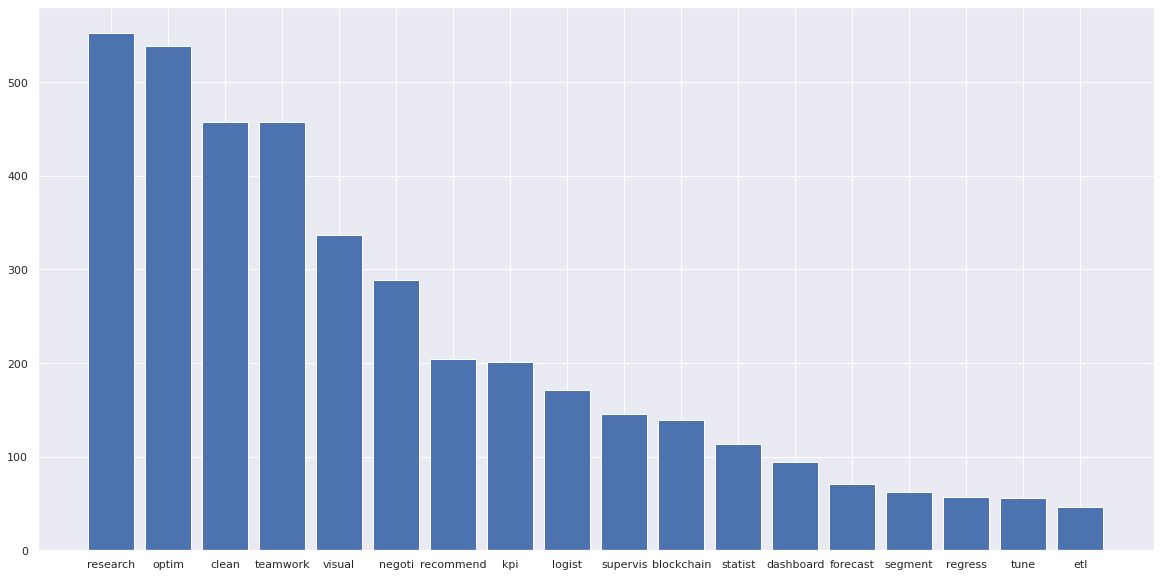

In [ ]:
fig = plt.figure(figsize = (20,10))
plt.bar(x.index[2:20], x.values[2:20])
plt.show()

In [ ]:
x.index

Index(['Not_skill', 'chi', 'research', 'optim', 'clean', 'teamwork', 'visual',
       'negoti', 'recommend', 'kpi', 'logist', 'supervis', 'blockchain',
       'statist', 'dashboard', 'forecast', 'segment', 'regress', 'tune', 'etl',
       'normal', 'gi', 'graph', 'predict', 'cluster', 'sequenc', 'exploratori',
       'anomali', 'chatbot', 'correl', 'boost', 'probabl', 'cleans', 'bay',
       'nlp', 'classif', 'econometr', 'reinforc', 'hypothesi', 'ocr',
       'bayesian'],
      dtype='object')

In [ ]:
visulazition1 = data[['index', 'tool_cut']]
sss = visulazition1.loc[visulazition1.duplicated() == False, :]['tool_cut'].value_counts()

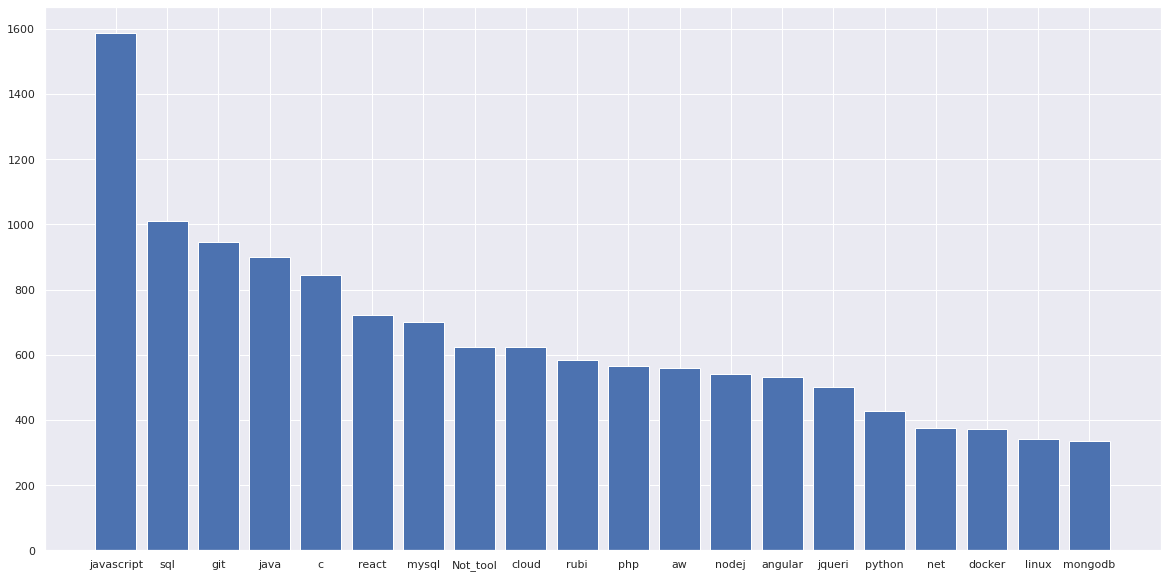

In [ ]:
fig = plt.figure(figsize = (20,10))
plt.bar(sss.index[:20], sss.values[:20])
plt.show()

In [ ]:
data.head(2)

,index,JobTitle,Company,Location,degree,tool_words,skill_words,level,YearExperience,JobUrl,skill_cut,tool_cut,degree_cut
0,0,net developer,smartdev,đà nẵng,Not_degree,nodej c sql aw,clean visual,"intern,",0,.NET Developer,clean,nodej,Not_degree
1,0,net developer,smartdev,đà nẵng,Not_degree,nodej c sql aw,clean visual,"intern,",0,.NET Developer,clean,c,Not_degree


In [ ]:
visulazition2 = data[['index', 'degree_cut']]
sss = visulazition2.loc[visulazition2.duplicated() == False, :]['degree_cut'].value_counts()

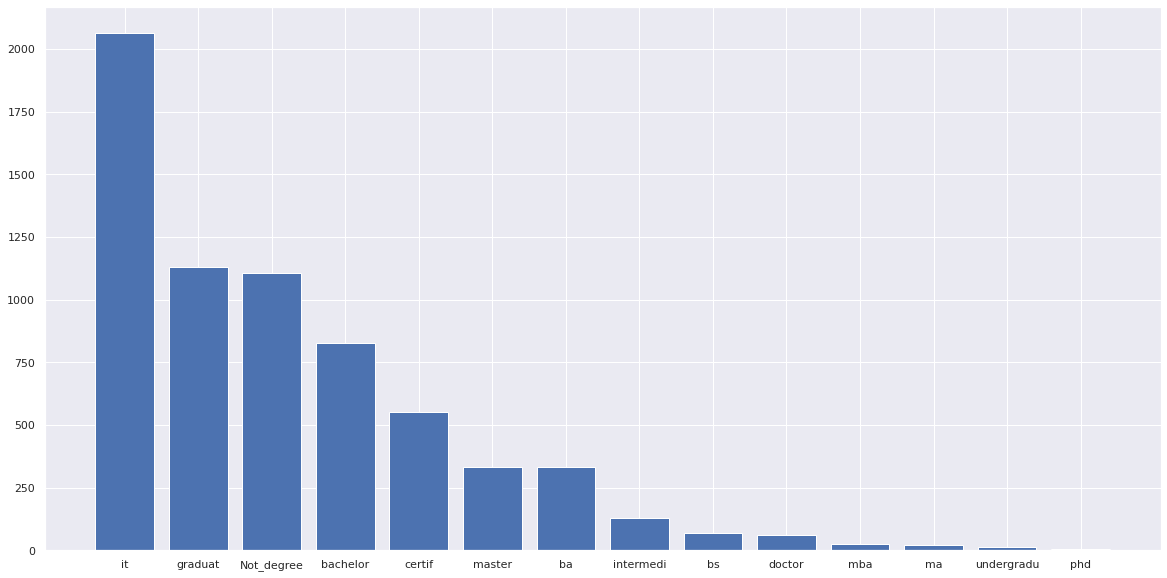

In [ ]:
fig = plt.figure(figsize = (20,10))
plt.bar(sss.index, sss.values)
plt.show()

In [ ]:
  data.head(3)

,index,JobTitle,Company,Location,degree,tool_words,skill_words,level,YearExperience,JobUrl,skill_cut,tool_cut,degree_cut
0,0,net developer,smartdev,đà nẵng,Not_degree,nodej c sql aw,clean visual,"intern,",0,.NET Developer,clean,nodej,Not_degree
1,0,net developer,smartdev,đà nẵng,Not_degree,nodej c sql aw,clean visual,"intern,",0,.NET Developer,clean,c,Not_degree
2,0,net developer,smartdev,đà nẵng,Not_degree,nodej c sql aw,clean visual,"intern,",0,.NET Developer,clean,sql,Not_degree


In [ ]:
data['level'] = data['level'].str.replace(', $', '')

<ipython-input-65-f8390da3a0db>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['level'] = data['level'].str.replace(', $', '')


In [ ]:
data.head()

,index,JobTitle,Company,Location,degree,tool_words,skill_words,level,YearExperience,JobUrl,skill_cut,tool_cut,degree_cut
0,0,net developer,smartdev,đà nẵng,Not_degree,nodej c sql aw,clean visual,intern,0,.NET Developer,clean,nodej,Not_degree
1,0,net developer,smartdev,đà nẵng,Not_degree,nodej c sql aw,clean visual,intern,0,.NET Developer,clean,c,Not_degree
2,0,net developer,smartdev,đà nẵng,Not_degree,nodej c sql aw,clean visual,intern,0,.NET Developer,clean,sql,Not_degree
3,0,net developer,smartdev,đà nẵng,Not_degree,nodej c sql aw,clean visual,intern,0,.NET Developer,clean,aw,Not_degree
4,0,net developer,smartdev,đà nẵng,Not_degree,nodej c sql aw,clean visual,intern,0,.NET Developer,visual,nodej,Not_degree


In [ ]:
datax1 = data[['index', 'level']]
datax1 = datax1.loc[datax1.duplicated() == False, :]
# phân chuỗi trong cột skill ra list rồi thực chia theo cột unnamed: 0
skill = pd.DataFrame(datax1.set_index('index').level.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)).reset_index()
# đổi tên cột 0 trong dataFrame skill thành 'skill_cut'
skill.rename(columns = {0:'level_cut'}, inplace = True)
# gộp dataFrame df và skill vói nhay theo "Unnameed: 0"
data = data.merge(skill, left_on = 'index', right_on = 'index')

In [ ]:
data.head()

,index,JobTitle,Company,Location,degree,tool_words,skill_words,level,YearExperience,JobUrl,skill_cut,tool_cut,degree_cut,level_cut
0,0,net developer,smartdev,đà nẵng,Not_degree,nodej c sql aw,clean visual,intern,0,.NET Developer,clean,nodej,Not_degree,intern
1,0,net developer,smartdev,đà nẵng,Not_degree,nodej c sql aw,clean visual,intern,0,.NET Developer,clean,c,Not_degree,intern
2,0,net developer,smartdev,đà nẵng,Not_degree,nodej c sql aw,clean visual,intern,0,.NET Developer,clean,sql,Not_degree,intern
3,0,net developer,smartdev,đà nẵng,Not_degree,nodej c sql aw,clean visual,intern,0,.NET Developer,clean,aw,Not_degree,intern
4,0,net developer,smartdev,đà nẵng,Not_degree,nodej c sql aw,clean visual,intern,0,.NET Developer,visual,nodej,Not_degree,intern


In [ ]:
data.loc[data.duplicated() == True, :]

,index,JobTitle,Company,Location,degree,tool_words,skill_words,level,YearExperience,JobUrl,skill_cut,tool_cut,degree_cut,level_cut


In [ ]:
visulazition2 = data[['index', 'level_cut']]
sss = visulazition2.loc[visulazition2.duplicated() == False, :]['level_cut'].value_counts()

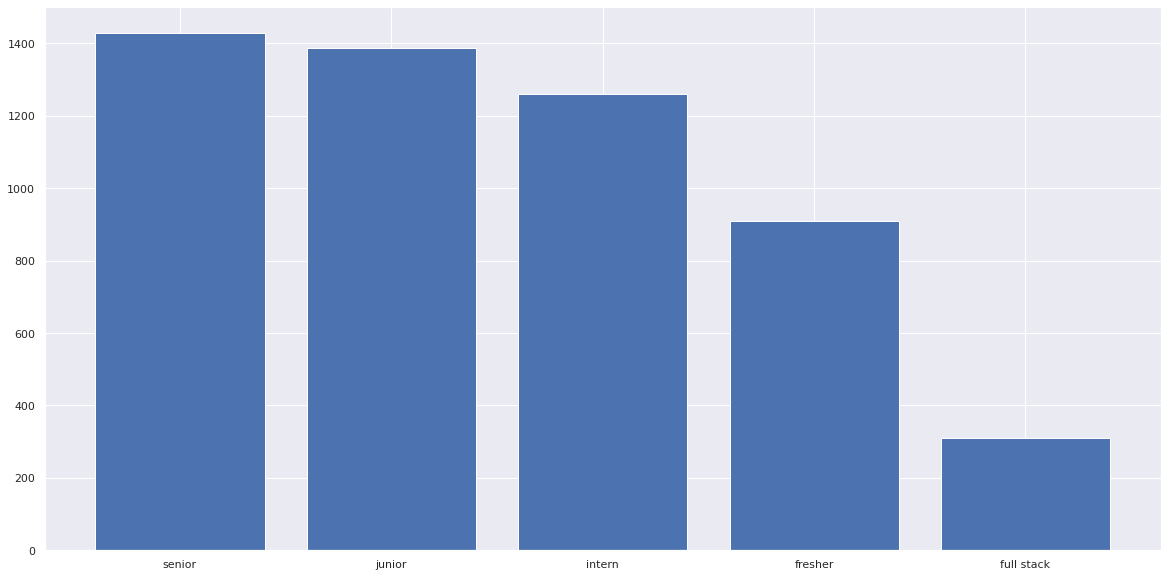

In [ ]:
fig = plt.figure(figsize = (20,10))
plt.bar(sss.index, sss.values)
plt.show()

In [ ]:
data

,index,JobTitle,Company,Location,degree,tool_words,skill_words,level,YearExperience,JobUrl,skill_cut,tool_cut,degree_cut,level_cut
0,0,net developer,smartdev,đà nẵng,Not_degree,nodej c sql aw,clean visual,intern,0,.NET Developer,clean,nodej,Not_degree,intern
1,0,net developer,smartdev,đà nẵng,Not_degree,nodej c sql aw,clean visual,intern,0,.NET Developer,clean,c,Not_degree,intern
2,0,net developer,smartdev,đà nẵng,Not_degree,nodej c sql aw,clean visual,intern,0,.NET Developer,clean,sql,Not_degree,intern
3,0,net developer,smartdev,đà nẵng,Not_degree,nodej c sql aw,clean visual,intern,0,.NET Developer,clean,aw,Not_degree,intern
4,0,net developer,smartdev,đà nẵng,Not_degree,nodej c sql aw,clean visual,intern,0,.NET Developer,visual,nodej,Not_degree,intern
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57899,4378,fullstack engineer,zühlke,thành phố hồ chí minh,certif bachelor master,angular github aw cloud azur react gcp java ku...,chi teamwork,senior,5,Full Stack Web Developer,teamwork,kubernet,bachelor,senior
57900,4378,fullstack engineer,zühlke,thành phố hồ chí minh,certif bachelor master,angular github aw cloud azur react gcp java ku...,chi teamwork,senior,5,Full Stack Web Developer,teamwork,kubernet,master,senior
57901,4378,fullstack engineer,zühlke,thành phố hồ chí minh,certif bachelor master,angular github aw cloud azur react gcp java ku...,chi teamwork,senior,5,Full Stack Web Developer,teamwork,docker,certif,senior
57902,4378,fullstack engineer,zühlke,thành phố hồ chí minh,certif bachelor master,angular github aw cloud azur react gcp java ku...,chi teamwork,senior,5,Full Stack Web Developer,teamwork,docker,bachelor,senior


In [ ]:
datax = data[['index', 'JobTitle', 'Company', 'Location', 'YearExperience', 'skill_cut',
       'tool_cut', 'degree_cut', 'level_cut', 'JobUrl']]

In [ ]:
datax['degree_cut'] = datax['degree_cut'].apply(lambda string: string.replace(string, degree_dict[string]) if string != 'Not_degree' else string, '')
datax['skill_cut'] = datax['skill_cut'].apply(lambda string: string.replace(string, skill_keywords1_dict[string]) if string != 'Not_skill' else string, '')
datax['tool_cut'] = datax['tool_cut'].apply(lambda string: string.replace(string, tool_keywords1_dict[string]) if string != 'Not_tool' else string, '')

<ipython-input-74-d86a059d3576>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datax['degree_cut'] = datax['degree_cut'].apply(lambda string: string.replace(string, degree_dict[string]) if string != 'Not_degree' else string, '')
<ipython-input-74-d86a059d3576>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datax['skill_cut'] = datax['skill_cut'].apply(lambda string: string.replace(string, skill_keywords1_dict[string]) if string != 'Not_skill' else string, '')
<ipython-input-74-d86a059d3576>:3: SettingWi

In [ ]:
datax

,index,JobTitle,Company,Location,YearExperience,skill_cut,tool_cut,degree_cut,level_cut,JobUrl
0,0,net developer,smartdev,đà nẵng,0,cleaning,nodejs,Not_degree,intern,.NET Developer
1,0,net developer,smartdev,đà nẵng,0,cleaning,c,Not_degree,intern,.NET Developer
2,0,net developer,smartdev,đà nẵng,0,cleaning,sql,Not_degree,intern,.NET Developer
3,0,net developer,smartdev,đà nẵng,0,cleaning,aws,Not_degree,intern,.NET Developer
4,0,net developer,smartdev,đà nẵng,0,visualization,nodejs,Not_degree,intern,.NET Developer
...,...,...,...,...,...,...,...,...,...,...
57899,4378,fullstack engineer,zühlke,thành phố hồ chí minh,5,teamwork,kubernetes,bachelor,senior,Full Stack Web Developer
57900,4378,fullstack engineer,zühlke,thành phố hồ chí minh,5,teamwork,kubernetes,master,senior,Full Stack Web Developer
57901,4378,fullstack engineer,zühlke,thành phố hồ chí minh,5,teamwork,docker,certificate,senior,Full Stack Web Developer
57902,4378,fullstack engineer,zühlke,thành phố hồ chí minh,5,teamwork,docker,bachelor,senior,Full Stack Web Developer


In [ ]:
# show infomaion data
def overView(x):
    listSummary = []
    for i in x.columns:
        row = x[i].shape[0]
        missingVal = x[i].isna().sum()
        unique = len(x[i].unique())
        typeCol = str(x[i].dtype)
        percentageMissingVal = x[i].isna().sum()/x.shape[0]*100
        listSummary.append([i, row,typeCol,unique, missingVal, percentageMissingVal])
    return pd.DataFrame(listSummary, columns = ['Name Columns', 'Total row', 'type col', 'Total unique', 'Total miss val', 'percentage missing value'])

In [ ]:
overView(datax)

,Name Columns,Total row,type col,Total unique,Total miss val,percentage missing value
0,index,57904,int64,4379,0,0.0
1,JobTitle,57904,object,1329,0,0.0
2,Company,57904,object,1102,0,0.0
3,Location,57904,object,39,0,0.0
4,YearExperience,57904,int64,23,0,0.0
5,skill_cut,57904,object,41,0,0.0
6,tool_cut,57904,object,93,0,0.0
7,degree_cut,57904,object,14,0,0.0
8,level_cut,57904,object,5,0,0.0
9,JobUrl,57904,object,13,0,0.0


In [ ]:
datax['Location'].unique()

array(['đà nẵng', 'thành phố hồ chí minh', 'việt nam', 'hà nội',
       'thành phố hồ chí minh+1 location', 'hà nội+1 location',
       'thủ dầu một', 'remote', 'bình dương', 'bắc ninh', 'đồng nai',
       'nha trang', 'quận 7', 'hòa bình', 'gò vấp', 'đắk lắk', 'long an',
       'thừa thiên - huế', 'long thành', 'nghệ an',
       'thành phố hồ chí minh+2 locations', 'cần thơ', 'an giang',
       'thủ đức', 'việt nam+1 location', 'huế', 'hạ long',
       'bình dương+1 location', 'hưng yên', 'bình định', 'đà lạt',
       'quảng ngãi', 'đà nẵng+1 location', 'hải phòng', 'hải dương',
       'thuận an', 'đà nẵng+2 locations', 'thanh hóa', 'khánh hòa'],
      dtype=object)

In [ ]:
datax['Location'] = datax['Location'].apply(lambda string: string.replace(string[string.find('+'): len(string)], '') if string.find('+') >0 else string, '')

<ipython-input-79-6b971afe958f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datax['Location'] = datax['Location'].apply(lambda string: string.replace(string[string.find('+'): len(string)], '') if string.find('+') >0 else string, '')


In [ ]:
datax['JobUrl'] = datax['JobUrl'].str.lower()

<ipython-input-80-657c3a357b16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datax['JobUrl'] = datax['JobUrl'].str.lower()


In [ ]:
overView(datax)

,Name Columns,Total row,type col,Total unique,Total miss val,percentage missing value
0,index,57904,int64,4379,0,0.0
1,JobTitle,57904,object,1329,0,0.0
2,Company,57904,object,1102,0,0.0
3,Location,57904,object,32,0,0.0
4,YearExperience,57904,int64,23,0,0.0
5,skill_cut,57904,object,41,0,0.0
6,tool_cut,57904,object,93,0,0.0
7,degree_cut,57904,object,14,0,0.0
8,level_cut,57904,object,5,0,0.0
9,JobUrl,57904,object,13,0,0.0


In [ ]:
datax

,index,JobTitle,Company,Location,YearExperience,skill_cut,tool_cut,degree_cut,level_cut,JobUrl
0,0,net developer,smartdev,đà nẵng,0,cleaning,nodejs,Not_degree,intern,.net developer
1,0,net developer,smartdev,đà nẵng,0,cleaning,c,Not_degree,intern,.net developer
2,0,net developer,smartdev,đà nẵng,0,cleaning,sql,Not_degree,intern,.net developer
3,0,net developer,smartdev,đà nẵng,0,cleaning,aws,Not_degree,intern,.net developer
4,0,net developer,smartdev,đà nẵng,0,visualization,nodejs,Not_degree,intern,.net developer
...,...,...,...,...,...,...,...,...,...,...
57899,4378,fullstack engineer,zühlke,thành phố hồ chí minh,5,teamwork,kubernetes,bachelor,senior,full stack web developer
57900,4378,fullstack engineer,zühlke,thành phố hồ chí minh,5,teamwork,kubernetes,master,senior,full stack web developer
57901,4378,fullstack engineer,zühlke,thành phố hồ chí minh,5,teamwork,docker,certificate,senior,full stack web developer
57902,4378,fullstack engineer,zühlke,thành phố hồ chí minh,5,teamwork,docker,bachelor,senior,full stack web developer


In [ ]:
datax.to_csv('data_powerBi.csv')

In [ ]:
len(datax['index'].unique())

4379

In [ ]:
datax['YearExperience'].unique()

array([  0,   4,   2,   1,   3,  20,   7,   5,  15,   6, 200,   9, 160,
        10,  30,   8, 100,  12,  40,  80,  11,  25,  22])

In [ ]:
datax.loc[datax['YearExperience'] <10, :]

,index,JobTitle,Company,Location,YearExperience,skill_cut,tool_cut,degree_cut,level_cut,JobUrl
0,0,net developer,smartdev,đà nẵng,0,cleaning,nodejs,Not_degree,intern,.net developer
1,0,net developer,smartdev,đà nẵng,0,cleaning,c,Not_degree,intern,.net developer
2,0,net developer,smartdev,đà nẵng,0,cleaning,sql,Not_degree,intern,.net developer
3,0,net developer,smartdev,đà nẵng,0,cleaning,aws,Not_degree,intern,.net developer
4,0,net developer,smartdev,đà nẵng,0,visualization,nodejs,Not_degree,intern,.net developer
...,...,...,...,...,...,...,...,...,...,...
57899,4378,fullstack engineer,zühlke,thành phố hồ chí minh,5,teamwork,kubernetes,bachelor,senior,full stack web developer
57900,4378,fullstack engineer,zühlke,thành phố hồ chí minh,5,teamwork,kubernetes,master,senior,full stack web developer
57901,4378,fullstack engineer,zühlke,thành phố hồ chí minh,5,teamwork,docker,certificate,senior,full stack web developer
57902,4378,fullstack engineer,zühlke,thành phố hồ chí minh,5,teamwork,docker,bachelor,senior,full stack web developer


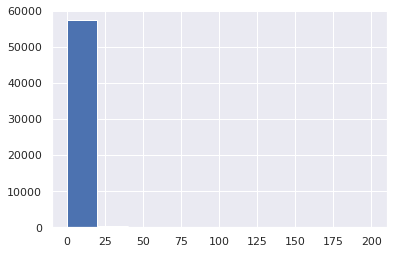

In [ ]:
datax['YearExperience'].hist()

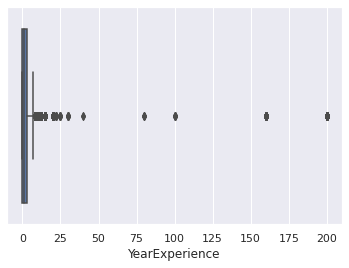

In [ ]:
sns.boxplot(x=datax['YearExperience'])

In [ ]:
datax = datax.loc[datax['YearExperience'] <10, :]

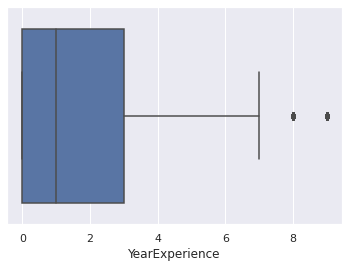

In [ ]:
sns.boxplot(x=datax['YearExperience'])

In [ ]:
# datax.to_csv('powerBI.csv')

In [ ]:
datax.shape

(56977, 10)

In [ ]:
datax.Location.unique()

array(['đà nẵng', 'thành phố hồ chí minh', 'việt nam', 'hà nội',
       'thủ dầu một', 'remote', 'bình dương', 'bắc ninh', 'đồng nai',
       'nha trang', 'quận 7', 'hòa bình', 'gò vấp', 'đắk lắk', 'long an',
       'thừa thiên - huế', 'long thành', 'nghệ an', 'cần thơ', 'an giang',
       'thủ đức', 'huế', 'hạ long', 'hưng yên', 'bình định', 'đà lạt',
       'quảng ngãi', 'hải phòng', 'thuận an', 'thanh hóa', 'khánh hòa'],
      dtype=object)